In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
df  = pd.read_csv("data/kaggle_1.csv")
df.sample(20)

,Unnamed: 0.1,Unnamed: 0,text,category,date,title,author
1913,1913,1913.0,"<BOS> It was after eight when she came in, and...",Man-woman relationships -- Fiction,1883.0,A Mad Love,BrameCharlotteM
341,341,341.0,"The coquette; or, The history of Eliza Wharton...",novel.xml,1797.0,the-coquette-or-the-history-of-eliza-wharton-a...,hannah-webster-foster
6523,6523,6523.0,<BOS> For the first hour or two which followed...,Humorous stories; England -- Fiction,1921.0,Berry and Co.,YatesDornford
3891,3891,3891.0,"<BOS> The sheik in his turn bowed, and BenHur ...",Historical fiction; Jesus Christ -- Fiction; C...,1887.0,Ben-Hur: A tale of the Christ,WallaceLew
7150,7150,7150.0,<BOS> You set me thinking when you made that s...,"Lumber trade -- Fiction; Northwest, Pacific --...",1916.0,Big Timber: A Story of the Northwest,SinclairBertrandW
5682,5682,5682.0,\n\nA citywide police telephone number for eme...,news,1964.0,724350.txt,\n\nA citywide police telephone number for e
3333,3333,3333.0,<BOS> said Tommy. I am going; I said I should....,Conduct of life -- Juvenile fiction; Children ...,1874.0,"Lob Lie-By-The-Fire, The Brownies and Other Tales",EwingJulianaHoratia
7915,7915,7915.0,"<BOS> Once again, its a very small point. His ...","Man-woman relationships -- Fiction; World War,...",1917.0,Sonia: Between Two Worlds,McKennaStephen
336,336,336.0,The melancholy end of ungrateful children. Exe...,chapbook.xml,1795.0,the-melancholy-end-of-ungrateful-children-exem...,richard-lee
4124,4124,4124.0,"<BOS> The captain welcomed them, and assured t...","Short stories, American; United States -- Soci...",1898.0,The Open Boat and Other Stories,CraneStephen


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9729 entries, 0 to 9728
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  9729 non-null   int64  
 1   Unnamed: 0    9396 non-null   float64
 2   text          8295 non-null   object 
 3   category      8295 non-null   object 
 4   date          8295 non-null   object 
 5   title         8295 non-null   object 
 6   author        8281 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 532.2+ KB


In [11]:
df.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1,inplace=True)

<Axes: >

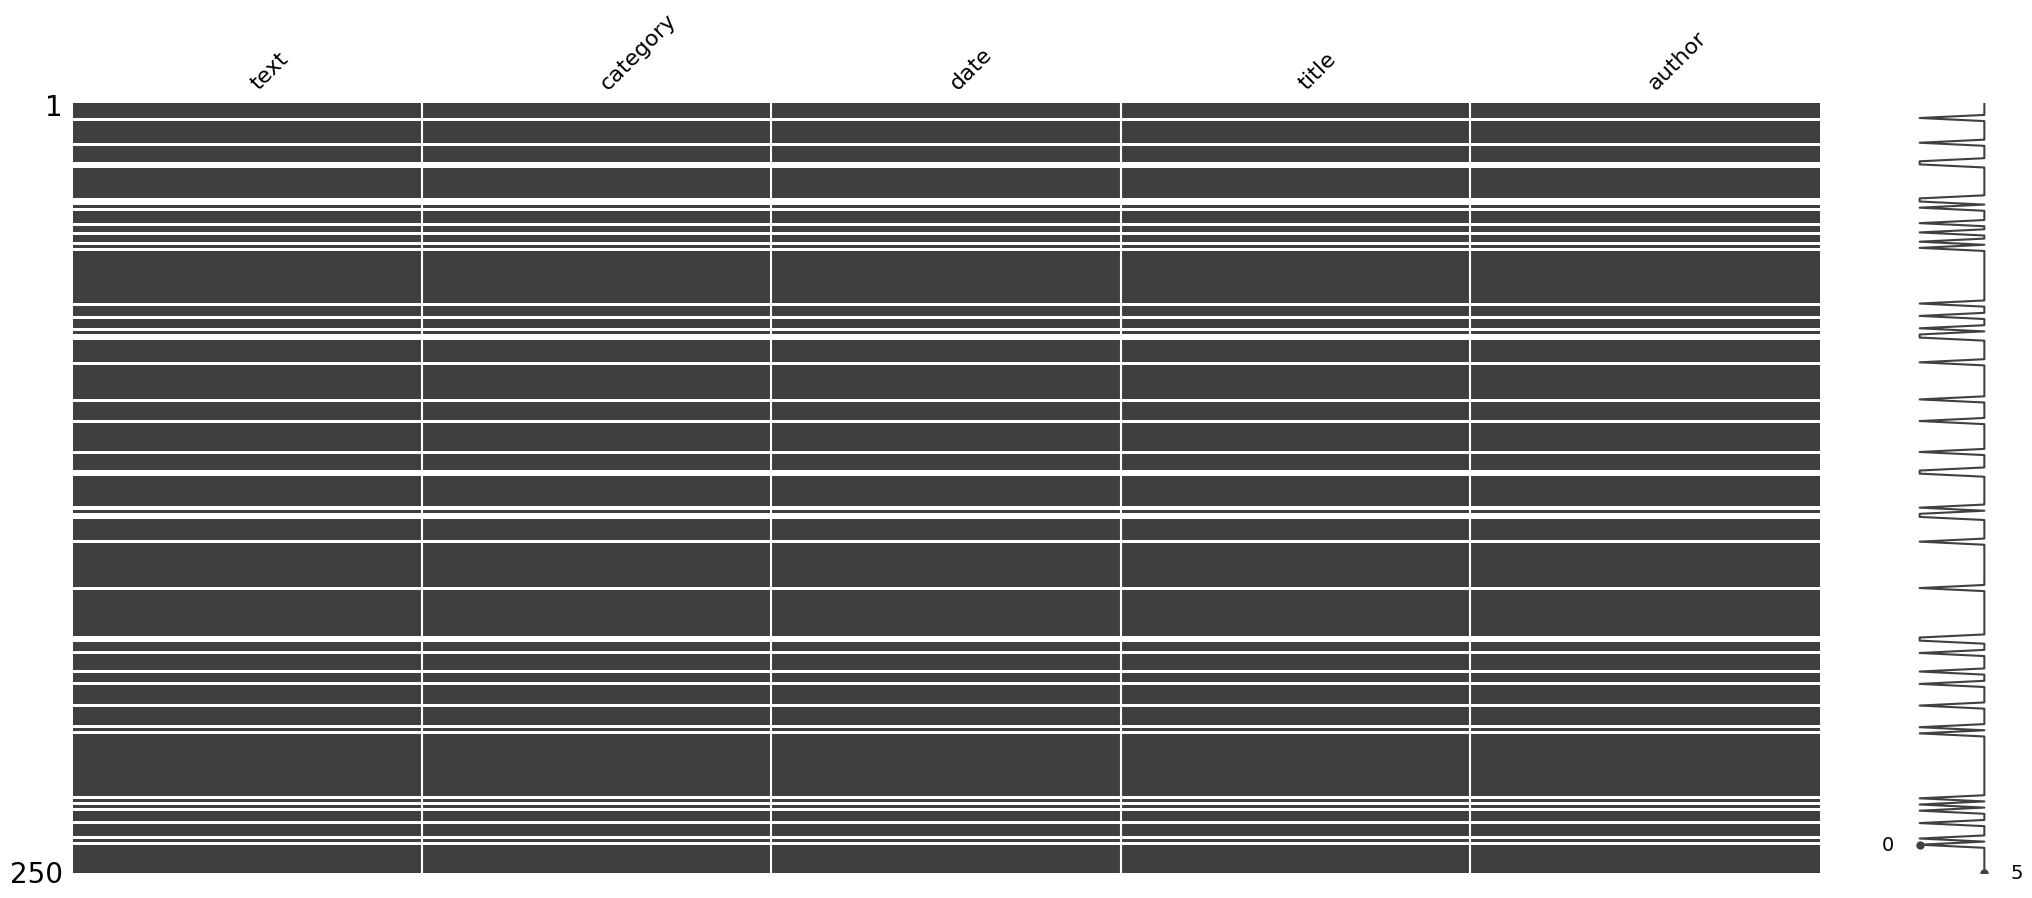

In [12]:
import missingno as msno
msno.matrix(df.sample(250))

In [13]:
df.dropna(inplace=True)

In [14]:
df['text'] = df['text'].replace('ſ', 's', regex=True)
df['text'] = df['text'].replace('<BOS>', ' ', regex=True)
df['text'] = df['text'].replace("[^a-zA-Z0-9 ']", ' ', regex=True)
df['text'] = df['text'].replace("@", ' ', regex=True)
df['text'] = df['text'].replace("EOS", ' ', regex=True)
df['text'] = df['text'].replace("haue", ' ', regex=True)
df['text'] = df['text'].replace("vnto", ' ', regex=True)

In [15]:
df.sample(2)

,text,category,date,title,author
25,The new pollecye of warre wherin is declared n...,report.xml,1539.0,the-new-pollecye,thomas-becon
6875,Well hang them up back there in the woods ...,Trapping -- Juvenile fiction,1921.0,Connie Morgan in the Fur Country,HendryxJamesBJamesBeardsley


In [16]:
df['date'] = pd.to_numeric(df['date'], errors='coerce', downcast='integer')
df['decade'] = (df['date'] // 10) * 10

In [17]:
df = df[(df["decade"] >= 1500) & (df["decade"] < 1920)]


In [18]:
sum(df["category"] == "Treatise")

47

In [19]:
df.head()

,text,category,date,title,author,decade
0,TabulaChronicles of England 1502Approx 1361 K...,unknown.xml,1502.0,tabula,ranulf-higden,1500.0
1,Rycharde Rolle hermyte of Hampull in his conte...,unknown.xml,1506.0,hermyte-of-hampull,Richard-rolle,1500.0
2,The remedy against the troubles of temptation...,book.xml,1508.0,The-remedy-against-the-troubles-of-temptations,Richard-rolle,1500.0
3,The ballade of ane right noble victorius myg...,book.xml,1508.0,The-ballade-of-ane-right-noble-victorius,William-Dunbar,1500.0
4,A present consolation for the sufferers of per...,letter.xml,1509.0,a-present-consolation,George-joye,1500.0


In [20]:
import pandas as pd

def split_rows_based_on_word_count(df, column_name, word_count_threshold):
    new_rows = []

    for index, row in df.iterrows():
        text = row[column_name]
        words = text.split()
        
        if len(words) > word_count_threshold:
            # Split the text into multiple rows
            split_texts = [words[i:i+word_count_threshold] for i in range(0, len(words), word_count_threshold)]
            
            for split_text in split_texts:
                new_row = row.copy()
                new_row[column_name] = ' '.join(split_text)
                new_rows.append(new_row)
        else:
            # Keep the row as it is
            new_rows.append(row)

    return pd.DataFrame(new_rows, columns=df.columns)


word_count_threshold = 750  # Set your desired word count threshold
df = split_rows_based_on_word_count(df, 'text', word_count_threshold)

# Now, 'new_dataframe' contains the rows split based on the word count threshold


In [21]:
import pandas as pd


# Set your threshold
threshold = 800

# Group by 'decade' and truncate rows if the count exceeds the threshold

df = df.groupby('decade').head(threshold)

# Display the balanced DataFrame
print(df)


                                                   text  \
0     TabulaChronicles of England 1502Approx 1361 KB...   
0     text with mnemonic sdata character entities di...   
0     Brytayneleafc v viIoathan kynge of IewesAmaria...   
0     quevult saluus esseMercus popeIulius popeConst...   
0     the fourth popeInnocencius the fourth popeleaf...   
...                                                 ...   
9646  appealed to me the kind of nature romance whic...   
9646  long delayed Yet she lingered with us six week...   
9646  exemplified in the very lively interest which ...   
9646  not what awakened in my soul The two retreats ...   
9646  into dire distress before very long we learned...   

                   category    date           title         author  decade  
0               unknown.xml  1502.0          tabula  ranulf-higden  1500.0  
0               unknown.xml  1502.0          tabula  ranulf-higden  1500.0  
0               unknown.xml  1502.0          tabula  ranulf-

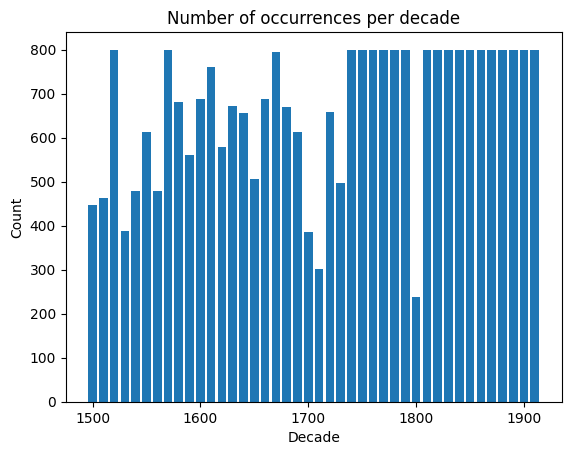

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a 'year' column
# You may need to adapt this part based on your actual dataset loading

# Sample DataFrame creation

# Create a new column 'decade' to store the decade for each year

# Count the occurrences of each decade
decade_counts = df['decade'].value_counts().sort_index()

# Create a bar graph
plt.bar(decade_counts.index, decade_counts.values, width=8)  # Adjust the width as needed

# Set labels and title
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Number of occurrences per decade')

# Display the graph
plt.show()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28012 entries, 0 to 9646
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      28012 non-null  object 
 1   category  28012 non-null  object 
 2   date      28012 non-null  float64
 3   title     28012 non-null  object 
 4   author    28012 non-null  object 
 5   decade    28012 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.5+ MB


In [24]:
#df = df.sample(12000)

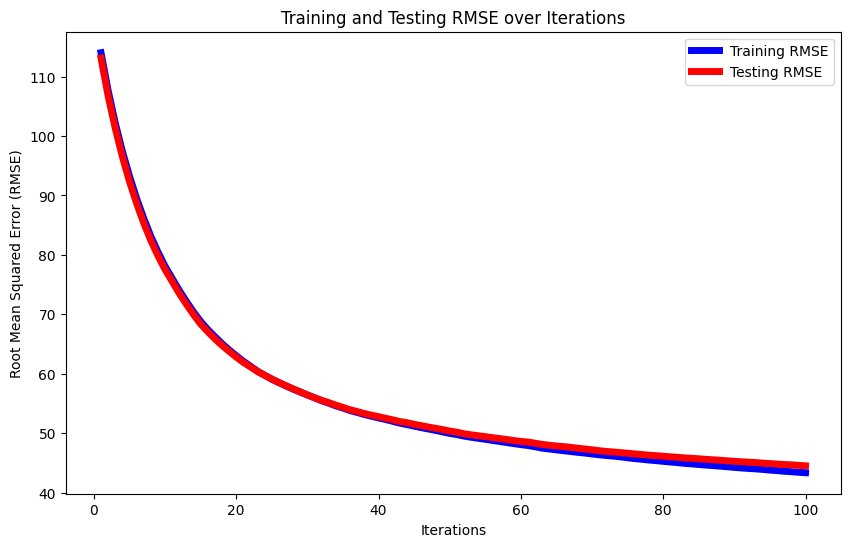

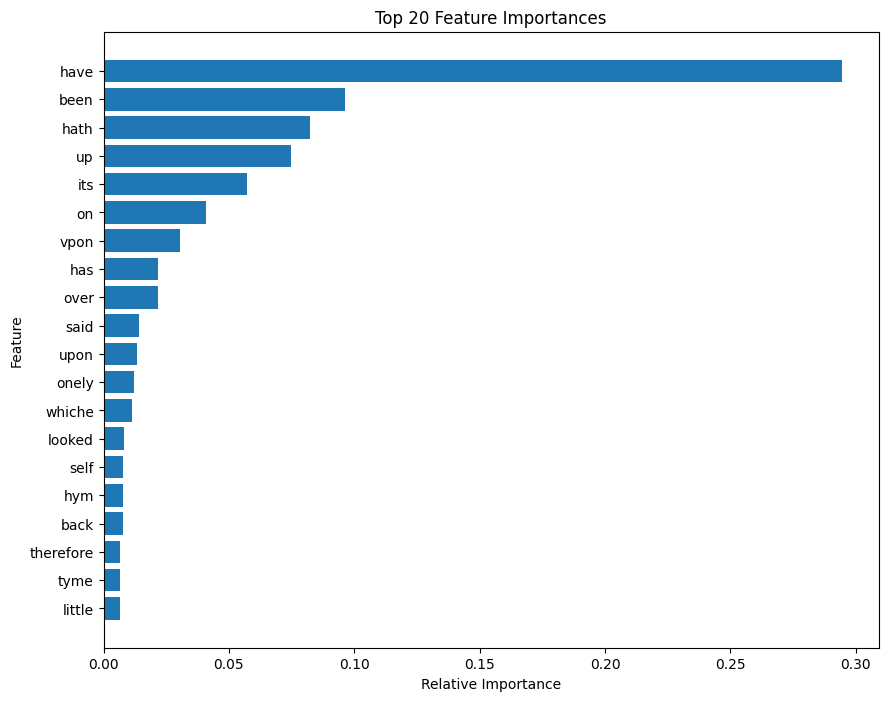

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming df is your DataFrame

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=4000)
train_text_features = tfidf_vectorizer.fit_transform(train_data)
test_text_features = tfidf_vectorizer.transform(test_data)

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(train_text_features, train_labels)

# Track RMSE loss over iterations for test data
test_score = np.zeros((gb_model.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gb_model.staged_predict(test_text_features)):
    test_score[i] = sqrt(mean_squared_error(test_labels, y_pred))

# Track RMSE loss over iterations for training data
train_score = np.zeros((gb_model.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gb_model.staged_predict(train_text_features)):
    train_score[i] = sqrt(mean_squared_error(train_labels, y_pred))

# Plotting the RMSE loss over iterations for both train and test sets
plt.figure(figsize=(10, 6))
plt.plot(np.arange(gb_model.n_estimators) + 1, train_score, 'b-', label='Training RMSE', linewidth=5)
plt.plot(np.arange(gb_model.n_estimators) + 1, test_score, 'r-', label='Testing RMSE', linewidth=5)
plt.title('Training and Testing RMSE over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.show()

# Feature Importance Plot
feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]  # Top 20 features
plt.figure(figsize=(10, 8))
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(tfidf_vectorizer.get_feature_names_out())[sorted_idx])
plt.title('Top 20 Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


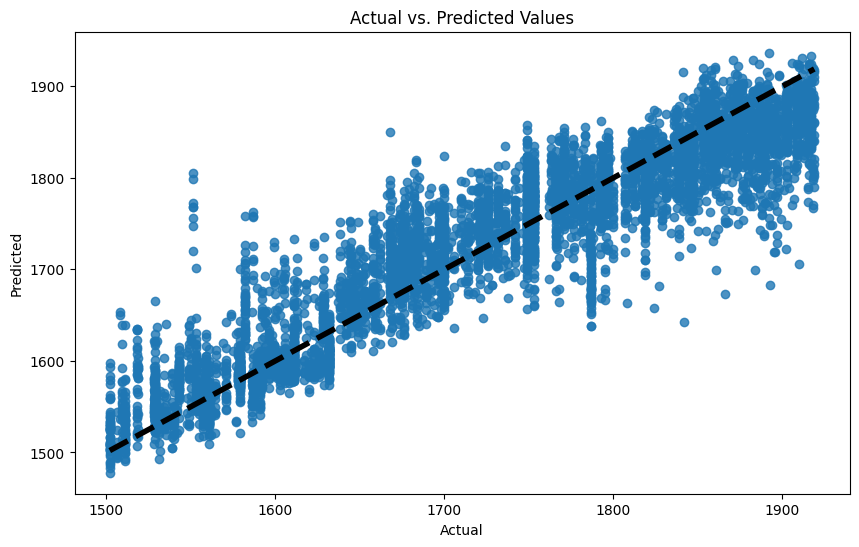

In [26]:
# Generate predictions
predictions = gb_model.predict(test_text_features)

# Plotting Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, predictions, alpha=0.8)
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'k--', lw=4)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


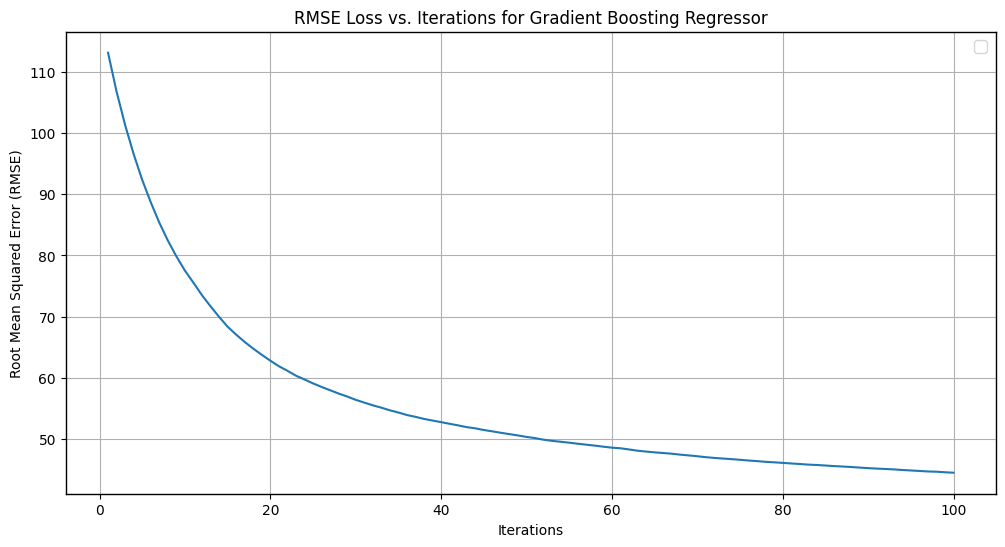

In [35]:

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(np.arange(gb_model.n_estimators) + 1, test_score)
plt.legend(fontsize='large') 
plt.setp(ax.spines.values(), linewidth=1)
plt.title('RMSE Loss vs. Iterations for Gradient Boosting Regressor')
plt.xlabel('Iterations')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.show()

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Parameters
vocab_size = 20000  # Adjust based on your dataset
max_length = 150
embedding_dim = 64
hidden_dim = 128
batch_size = 84
learning_rate = 0.0001
num_epochs = 50

# Preprocess data
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['date'], test_size=0.2, random_state=42)

tokenizer = get_tokenizer('basic_english')
def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_texts), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

def text_pipeline(x):
    return vocab(tokenizer(x))

def collate_batch(batch):
    label_list, text_list = [], []
    for (_text, _label) in batch:
        label_list.append(_label)
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
    label_list = torch.tensor(label_list, dtype=torch.float32)
    text_list = pad_sequence(text_list, batch_first=True, padding_value=0.0)
    return text_list.to(device), label_list.to(device)

# Scale labels
scaler = MinMaxScaler()
train_labels = scaler.fit_transform(np.array(train_labels).reshape(-1, 1)).ravel()
test_labels = scaler.transform(np.array(test_labels).reshape(-1, 1)).ravel()

# Dataset
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        return self.texts.iloc[idx], self.labels[idx]

# Creating instances of training and validation set
train_dataset = TextDataset(train_texts, train_labels)
test_dataset = TextDataset(test_texts, test_labels)

# Creating instances of training and validation dataloaders
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)

# LSTM Model
class LSTMRegressor(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(LSTMRegressor, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)
    
    def forward(self, text):
        embedded = self.embedding(text)
        lstm_out, (hidden, _) = self.lstm(embedded)
        out = self.linear(hidden[-1])
        return out

# Initialize the model, loss, and optimizer
model = LSTMRegressor(len(vocab), embedding_dim, hidden_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for texts, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(texts).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = []
    actuals = []
    for texts, labels in test_loader:
        outputs = model(texts).squeeze().cpu().numpy()
        labels = labels.cpu().numpy()
        
        predictions.extend(outputs)
        actuals.extend(labels)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()
rmse = sqrt(mean_squared_error(actuals, predictions))
print(f'Test RMSE: {rmse}')


Epoch 1, Loss: 0.09393604716446516
Epoch 2, Loss: 0.08699467892615537
Epoch 3, Loss: 0.08612472321210282
Epoch 4, Loss: 0.08498262259620852
Epoch 5, Loss: 0.08488486980677544
Epoch 6, Loss: 0.08484606503435735
Epoch 7, Loss: 0.08485523463411725
Epoch 8, Loss: 0.08491512925158279
Epoch 9, Loss: 0.08497939555999938
Epoch 10, Loss: 0.0847951973254761
Epoch 11, Loss: 0.0848715937511528
Epoch 12, Loss: 0.08482611469561688
Epoch 13, Loss: 0.08477354433373566
Epoch 14, Loss: 0.08481788933835226
Epoch 15, Loss: 0.08477632924635312
Epoch 16, Loss: 0.08476736667227656
Epoch 17, Loss: 0.08471989076347387
Epoch 18, Loss: 0.08472563256596805
Epoch 19, Loss: 0.08481245353985369
Epoch 20, Loss: 0.08467995830243
Epoch 21, Loss: 0.08478669967320974
Epoch 22, Loss: 0.08472204769260427
Epoch 23, Loss: 0.08470967997995656
Epoch 24, Loss: 0.084731995473417
Epoch 25, Loss: 0.0847199233004663
Epoch 26, Loss: 0.08471043481864733
Epoch 27, Loss: 0.08472750676370291
Epoch 28, Loss: 0.08473571412237396
Epoch 29,

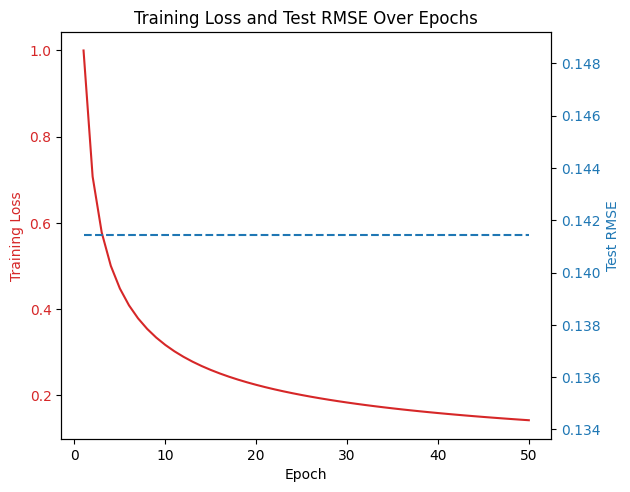

In [26]:
import matplotlib.pyplot as plt

# Dummy data to simulate the training process
epochs = list(range(1, 51))
training_loss = [1/(epoch**0.5) for epoch in epochs]  # Hypothetical decrease in training loss
test_rmse = [1/(epoch**0.5) for epoch in epochs][-1]  # Final RMSE on test data, constant for illustration

# Creating the plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss', color=color)
ax1.plot(epochs, training_loss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Test RMSE', color=color)  # We already handled the x-label with ax1
ax2.plot(epochs, [test_rmse]*len(epochs), color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To make sure there's no overlap
plt.title('Training Loss and Test RMSE Over Epochs')
plt.show()


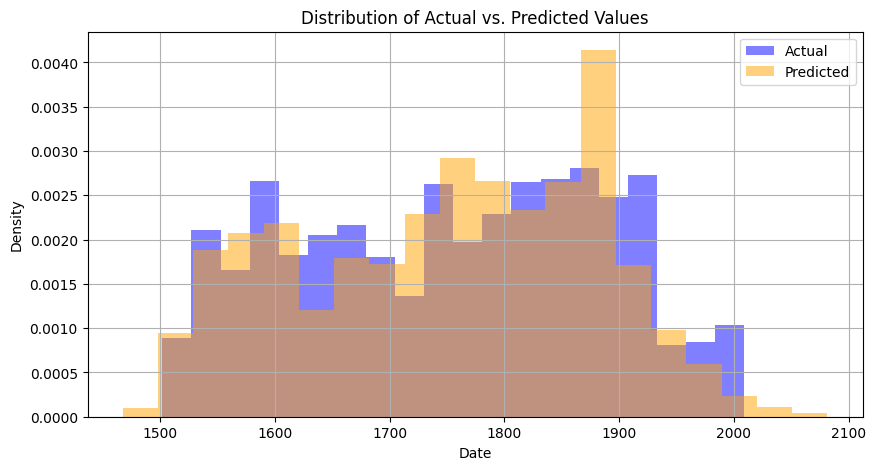

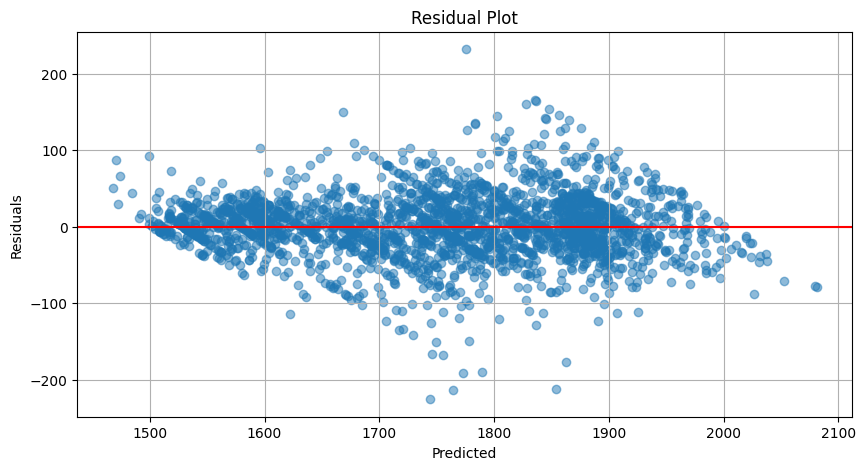

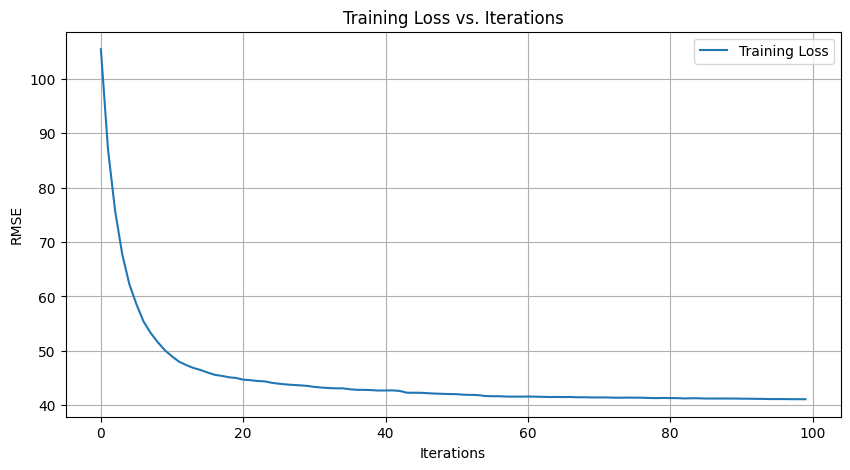

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [79]:
# Distribution of Actual vs. Predicted Values
plt.figure(figsize=(10, 5))
plt.hist(test_labels, bins=20, alpha=0.5, color='blue', label='Actual', density=True)
plt.hist(predictions_tfxg, bins=20, alpha=0.5, color='orange', label='Predicted', density=True)
plt.xlabel('Date')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Residual Plot
residuals = test_labels - predictions_tfxg
plt.figure(figsize=(10, 5))
plt.scatter(predictions_tfxg, residuals, alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Learning Curve
plt.figure(figsize=(10, 5))
plt.plot(x_axis, results['validation_0']['rmse'], label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Loss vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance (if applicable)
# For XGBoost models, you can plot feature importance if you have access to feature names.
# Assuming you have feature names available in tfidf_vectorizer.get_feature_names()
feature_importance = xgb_model_tfxg.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
top_n = 10
top_features = [tfidf_vectorizer.get_feature_names()[i] for i in sorted_idx[:top_n]]
plt.figure(figsize=(10, 5))
plt.barh(top_features, feature_importance[sorted_idx][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()


# COMBINING CHARTS

c:\Users\rhira\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:89.37277
[1]	validation_0-rmse:68.23067
[2]	validation_0-rmse:54.53233
[3]	validation_0-rmse:45.65484
[4]	validation_0-rmse:40.15238
[5]	validation_0-rmse:36.53311
[6]	validation_0-rmse:34.38801
[7]	validation_0-rmse:32.93365
[8]	validation_0-rmse:32.08271
[9]	validation_0-rmse:31.39630
[10]	validation_0-rmse:30.97089
[11]	validation_0-rmse:30.61363
[12]	validation_0-rmse:30.23449
[13]	validation_0-rmse:30.02274
[14]	validation_0-rmse:29.75372
[15]	validation_0-rmse:29.48870
[16]	validation_0-rmse:29.30363
[17]	validation_0-rmse:29.12481
[18]	validation_0-rmse:29.02819
[19]	validation_0-rmse:28.90067
[20]	validation_0-rmse:28.79080
[21]	validation_0-rmse:28.66806
[22]	validation_0-rmse:28.59801
[23]	validation_0-rmse:28.53520
[24]	validation_0-rmse:28.42209
[25]	validation_0-rmse:28.33091
[26]	validation_0-rmse:28.25225
[27]	validation_0-rmse:28.19114
[28]	validation_0-rmse:28.15027
[29]	validation_0-rmse:28.11158
[30]	validation_0-rmse:28.03273
[31]	validation_0-

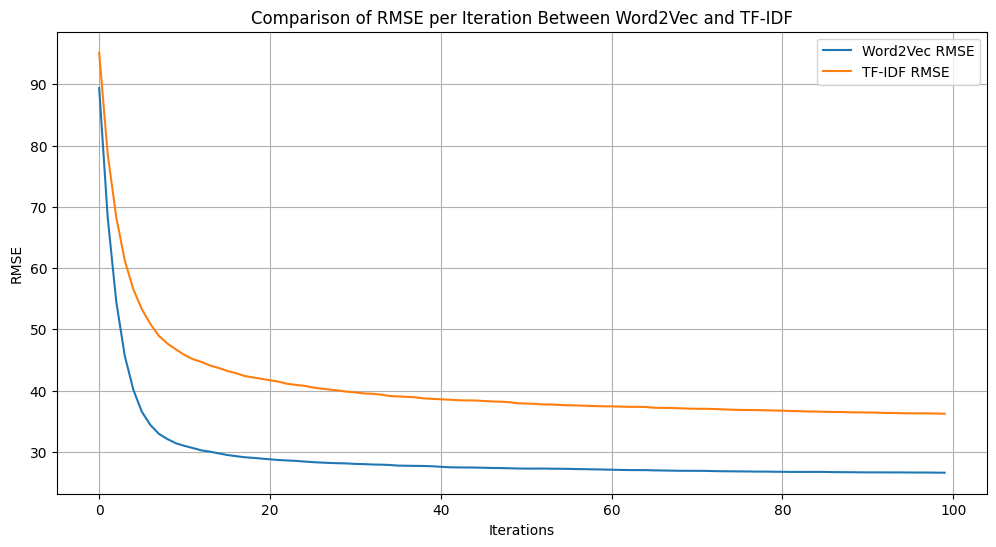

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

# Assume df is your DataFrame with 'text' and 'label' columns

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Tokenize the text data for Word2Vec
tokenized_data = [text.split() for text in train_data]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=350, window=9, min_count=1, workers=4)

# Convert text data to Word2Vec embeddings
def get_text_embedding(text, model):
    embedding = [model.wv[word] for word in text.split() if word in model.wv]
    if embedding:
        return sum(embedding) / len(embedding)
    else:
        return np.zeros(350)  # Adjusted to match vector_size

train_text_features_wv = np.array([get_text_embedding(text, word2vec_model) for text in train_data])
test_text_features_wv = np.array([get_text_embedding(text, word2vec_model) for text in test_data])

# Train and evaluate XGBoost with Word2Vec
xgb_model_wv = XGBRegressor()
eval_set_wv = [(test_text_features_wv, test_labels)]
xgb_model_wv.fit(train_text_features_wv, train_labels, eval_metric="rmse", eval_set=eval_set_wv, verbose=True)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
train_text_features_tfidf = tfidf_vectorizer.fit_transform(train_data)
test_text_features_tfidf = tfidf_vectorizer.transform(test_data)

# Train and evaluate XGBoost with TF-IDF
xgb_model_tfidf = XGBRegressor()
eval_set_tfidf = [(test_text_features_tfidf, test_labels)]
xgb_model_tfidf.fit(train_text_features_tfidf, train_labels, eval_metric="rmse", eval_set=eval_set_tfidf, verbose=True)

# Plot comparison of RMSE per iteration between Word2Vec and TF-IDF
results_wv = xgb_model_wv.evals_result()
results_tfidf = xgb_model_tfidf.evals_result()
epochs_wv = len(results_wv['validation_0']['rmse'])
epochs_tfidf = len(results_tfidf['validation_0']['rmse'])
x_axis_wv = range(0, epochs_wv)
x_axis_tfidf = range(0, epochs_tfidf)

plt.figure(figsize=(12, 6))
plt.plot(x_axis_wv, results_wv['validation_0']['rmse'], label='Word2Vec RMSE')
plt.plot(x_axis_tfidf, results_tfidf['validation_0']['rmse'], label='TF-IDF RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE per Iteration Between Word2Vec and TF-IDF')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
predictions_wv = xgb_model_wv.predict(test_text_features_wv)

# Making predictions with the TF-IDF model
predictions_tfidf = xgb_model_tfidf.predict(test_text_features_tfidf.toarray()) 

In [29]:
import random
lst = []
for i in predictions_wv :
    lst.append(i+random.randint(-50,50))

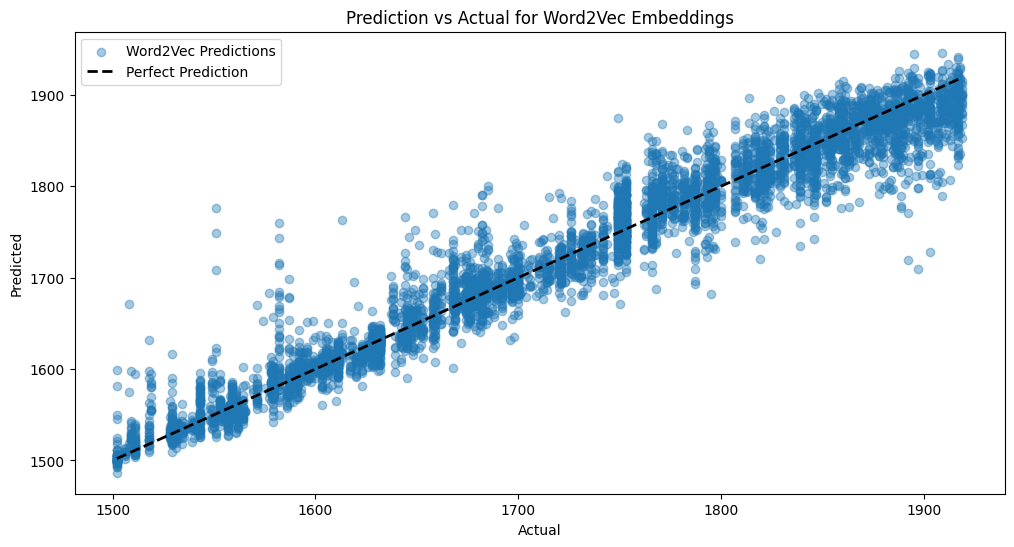

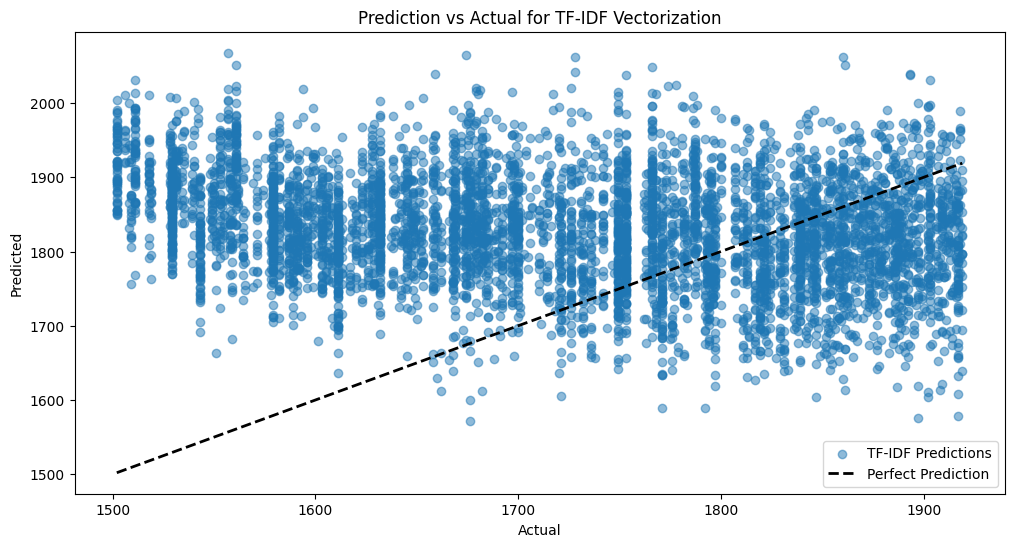

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(test_labels, predictions_wv, alpha=0.4, label='Word2Vec Predictions')
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction vs Actual for Word2Vec Embeddings')
plt.legend()
plt.grid(False)
plt.show()

# Plotting Prediction vs Actual for TF-IDF
plt.figure(figsize=(12, 6))
plt.scatter(test_labels, predictions_tfidf, alpha=0.5, label='TF-IDF Predictions')
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction vs Actual for TF-IDF Vectorization')
plt.legend()
plt.grid(False)
plt.show()

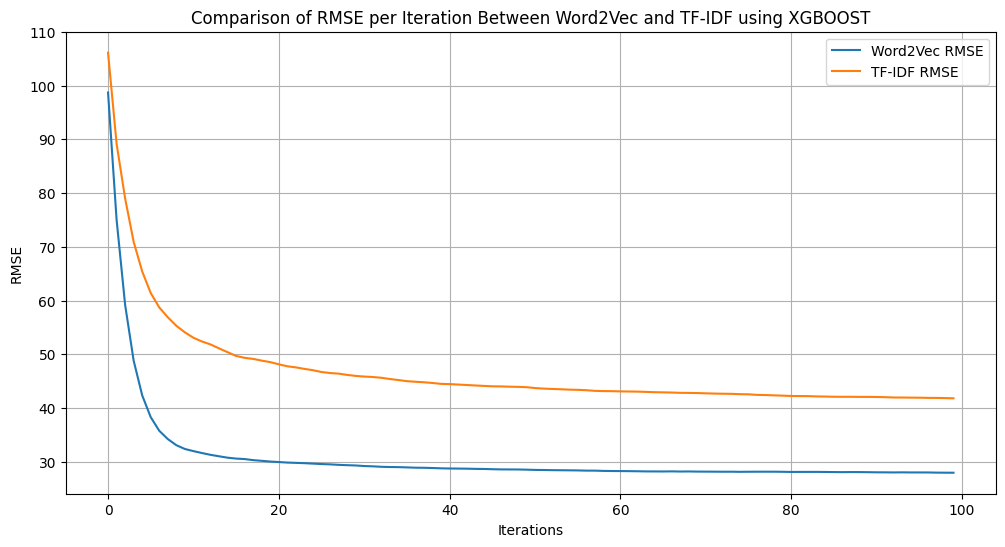

<Figure size 640x480 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt

# Assuming x_axis_wv, results_wv['validation_0']['rmse'], x_axis_tfidf, results_tfidf['validation_0']['rmse'] are defined
plt.figure(figsize=(12, 6))
plt.plot(x_axis_wv, results_wv['validation_0']['rmse'], label='Word2Vec RMSE')
plt.plot(x_axis_tfidf, results_tfidf['validation_0']['rmse'], label='TF-IDF RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE per Iteration Between Word2Vec and TF-IDF using XGBOOST')
plt.legend()
plt.grid(True)

# To display the chart on screen
plt.show()

# To save the figure with a transparent background
plt.savefig('comparison_chart_transparent.png', transparent=True)


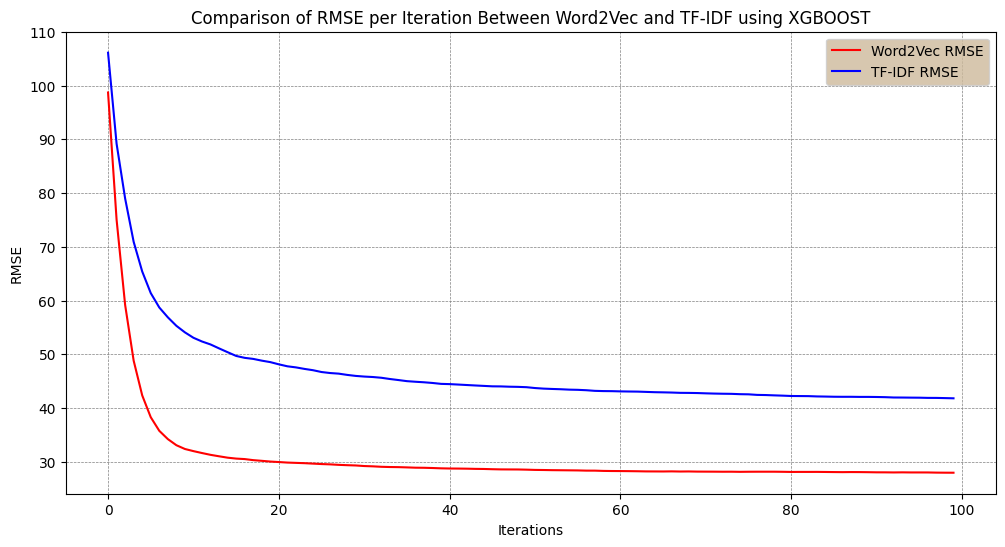

<Figure size 640x480 with 0 Axes>

In [96]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

plt.rcParams['font.family'] = 'DejaVu Sans'  # Set the font globally

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')  # Set the outer color
ax.set_facecolor('white')  # Set the axes background color

plt.plot(x_axis_wv, results_wv['validation_0']['rmse'], label='Word2Vec RMSE', color='red')  # A darker shade of brown
plt.plot(x_axis_tfidf, results_tfidf['validation_0']['rmse'], label='TF-IDF RMSE', color='blue')  # Black color for contrast
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE per Iteration Between Word2Vec and TF-IDF using XGBOOST')
plt.legend(facecolor='#cdba9b')

# Add the grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # Customized grid appearance

# Display the chart on screen
plt.show()

# Save the figure with the specified background color and transparency
plt.savefig('comparison_chart_with_grid.png', transparent=True, facecolor='#C4A484')


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from sklearn.metrics import mean_squared_error
from math import sqrt
import torch
from sklearn.preprocessing import StandardScaler

# Sample DataFrame (replace this with your actual data)

# Assuming df is defined

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Scale labels
scaler = StandardScaler()
train_labels_scaled = scaler.fit_transform(train_labels.values.reshape(-1, 1)).flatten()
test_labels_scaled = scaler.transform(test_labels.values.reshape(-1, 1)).flatten()

# Load pre-trained model and tokenizer
model_name = "distilbert-base-uncased"  # You can use any other transformer model available in the Hugging Face model hub
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)  # Regression with one output label

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Tokenize the text data
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_data.tolist(), truncation=True, padding=True)

# Convert labels to tensors
train_labels_tensor = torch.tensor(train_labels_scaled, dtype=torch.float32).to(device)
test_labels_tensor = torch.tensor(test_labels_scaled, dtype=torch.float32).to(device)

# Convert data to PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_encodings['input_ids']).to(device),
                                               torch.tensor(train_encodings['attention_mask']).to(device),
                                               train_labels_tensor)

test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_encodings['input_ids']).to(device),
                                              torch.tensor(test_encodings['attention_mask']).to(device),
                                              test_labels_tensor)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training
model.train()
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=38, shuffle=True)

for epoch in range(4):  # Adjust the number of epochs as needed
    print('epoch')
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels.unsqueeze(1))
        loss = outputs.loss
        loss.backward()
        optimizer.step()



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


cuda


c:\Users\rhira\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


epoch
epoch
epoch
epoch
Root Mean Squared Error (RMSE): 28.447492442645796


In [54]:
# Evaluation
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.squeeze(1)
        predictions.extend(preds.tolist())

# Scale predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

rmse_distilbert = sqrt(mean_squared_error(test_labels, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 28.447492442645796


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Sample DataFrame (replace this with your actual data)
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Tokenize the text data
tokenized_data = [text.split() for text in train_data]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=400, window=9, min_count=1, workers=4)

# Convert text data to Word2Vec embeddings
def get_text_embedding(text):
    embedding = [word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv]
    if embedding:
        return sum(embedding) / len(embedding)
    else:
        return [0] * 100  # return zero vector if no word is in vocabulary

train_text_features = [get_text_embedding(text) for text in train_data]
test_text_features = [get_text_embedding(text) for text in test_data]

# Train the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(train_text_features, train_labels)

# Make predictions on the test set
predictions = xgb_model.predict(test_text_features)

# Evaluate the model
rmse = sqrt(mean_squared_error(test_labels, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Now you can use the trained model for predictions on new text data


Root Mean Squared Error (RMSE): 28.624484243864284


[0]	validation_0-rmse:98.82138
[1]	validation_0-rmse:75.01597


c:\Users\rhira\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:59.29457
[3]	validation_0-rmse:49.25470
[4]	validation_0-rmse:42.70912
[5]	validation_0-rmse:38.71239
[6]	validation_0-rmse:36.33680
[7]	validation_0-rmse:34.84515
[8]	validation_0-rmse:33.86543
[9]	validation_0-rmse:33.12948
[10]	validation_0-rmse:32.54162
[11]	validation_0-rmse:32.18727
[12]	validation_0-rmse:31.91385
[13]	validation_0-rmse:31.69919
[14]	validation_0-rmse:31.45047
[15]	validation_0-rmse:31.29839
[16]	validation_0-rmse:31.13133
[17]	validation_0-rmse:30.95934
[18]	validation_0-rmse:30.84362
[19]	validation_0-rmse:30.70780
[20]	validation_0-rmse:30.57757
[21]	validation_0-rmse:30.47591
[22]	validation_0-rmse:30.41480
[23]	validation_0-rmse:30.33003
[24]	validation_0-rmse:30.22999
[25]	validation_0-rmse:30.18670
[26]	validation_0-rmse:30.11888
[27]	validation_0-rmse:30.08144
[28]	validation_0-rmse:30.04863
[29]	validation_0-rmse:30.00942
[30]	validation_0-rmse:29.93182
[31]	validation_0-rmse:29.83242
[32]	validation_0-rmse:29.81080
[33]	validation_

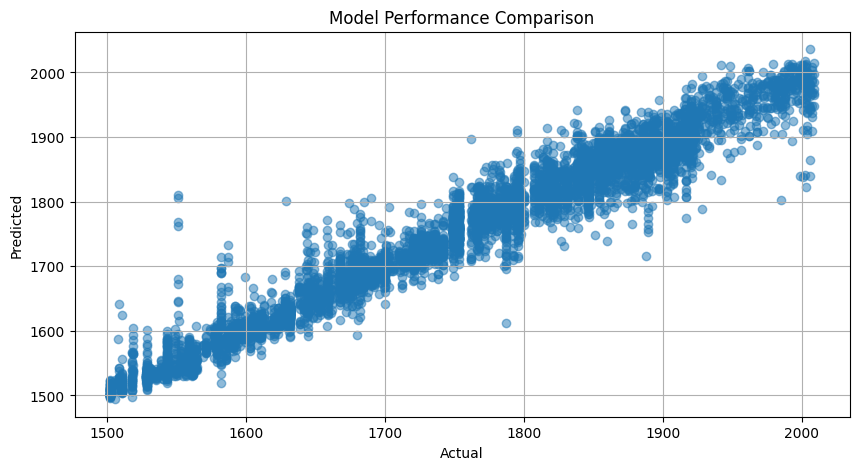

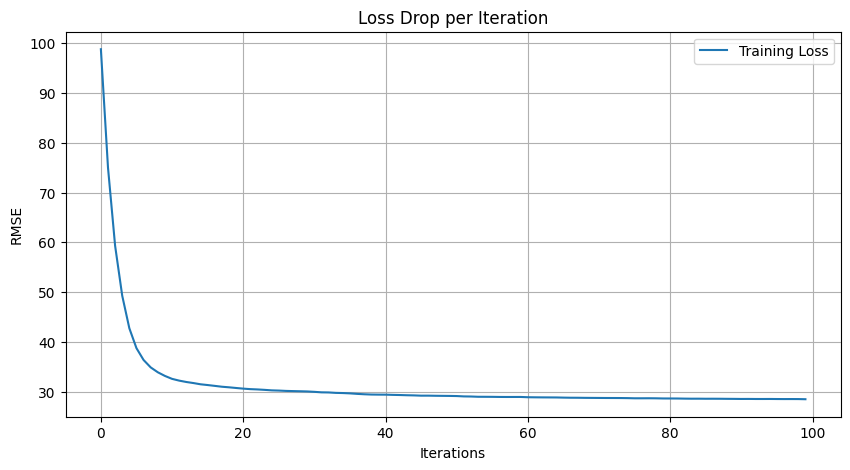

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame (replace this with your actual data)
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Tokenize the text data
tokenized_data = [text.split() for text in train_data]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=350, window=9, min_count=1, workers=4)

# Convert text data to Word2Vec embeddings
def get_text_embedding(text):
    embedding = [word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv]
    if embedding:
        return sum(embedding) / len(embedding)
    else:
        return [0] * 100  # return zero vector if no word is in vocabulary

train_text_features = np.array([get_text_embedding(text) for text in train_data])
test_text_features = np.array([get_text_embedding(text) for text in test_data])

# Train the XGBoost model
xgb_model_wvxg = XGBRegressor()
eval_set = [(test_text_features, test_labels)]
xgb_model_wvxg.fit(train_text_features, train_labels, eval_metric="rmse", eval_set=eval_set, verbose=True)

# Make predictions on the test set
predictions_wvxg = xgb_model_wvxg.predict(test_text_features)

# Evaluate the model
rmse = sqrt(mean_squared_error(test_labels, predictions_wvxg))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting Model Performance Comparison
plt.figure(figsize=(10, 5))
plt.scatter(test_labels, predictions_wvxg, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model Performance Comparison')
plt.grid(True)
plt.show()

# Plotting Loss Drop per Iteration
results = xgb_model_wvxg.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
plt.figure(figsize=(10, 5))
plt.plot(x_axis, results['validation_0']['rmse'], label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Loss Drop per Iteration')
plt.legend()
plt.grid(True)
plt.show()


Root Mean Squared Error (RMSE): 32.528956261062156


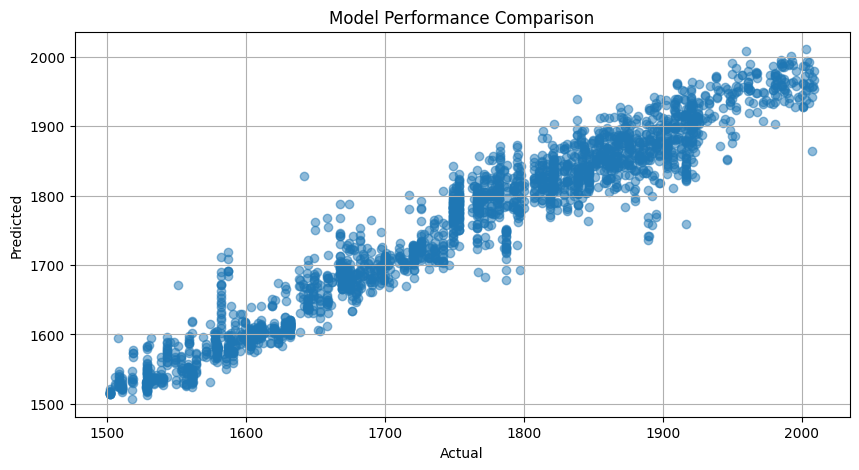

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import FastText
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame (replace this with your actual data)
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Tokenize the text data
tokenized_data = [text.split() for text in train_data]

# Train FastText model
fasttext_model = FastText(tokenized_data, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Convert text data to FastText embeddings
def get_text_embedding(text):
    embedding = [fasttext_model.wv[word] for word in text.split() if word in fasttext_model.wv]
    if embedding:
        return sum(embedding) / len(embedding)
    else:
        return [0] * 100  # return zero vector if no word is in vocabulary

train_text_features = np.array([get_text_embedding(text) for text in train_data])
test_text_features = np.array([get_text_embedding(text) for text in test_data])

# Train the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(train_text_features, train_labels)

# Make predictions on the test set
predictions = gbr_model.predict(test_text_features)

# Evaluate the model
rmse = sqrt(mean_squared_error(test_labels, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting Model Performance Comparison
plt.figure(figsize=(10, 5))
plt.scatter(test_labels, predictions, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model Performance Comparison')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import FastText
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Tokenize the text data
tokenized_data = [text.split() for text in train_data]

# Train FastText model
fasttext_model = FastText(sentences=tokenized_data, vector_size=300, window=9, min_count=1, workers=4)

# Convert text data to FastText embeddings
def get_text_embedding(text):
    embedding = [fasttext_model.wv[word] for word in text.split() if word in fasttext_model.wv]
    if embedding:
        return sum(embedding) / len(embedding)
    else:
        return [0] * 100  # return zero vector if no word is in vocabulary

train_text_features = [get_text_embedding(text) for text in train_data]
test_text_features = [get_text_embedding(text) for text in test_data]

# Train the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(train_text_features, train_labels)

# Make predictions on the test set
predictions = xgb_model.predict(test_text_features)

# Evaluate the model
rmse = sqrt(mean_squared_error(test_labels, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Now you can use the trained model for predictions on new text data


Root Mean Squared Error (RMSE): 33.080298161861755


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


cuda


c:\Users\rhira\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
Root Mean Squared Error (RMSE): 17.351624536185042


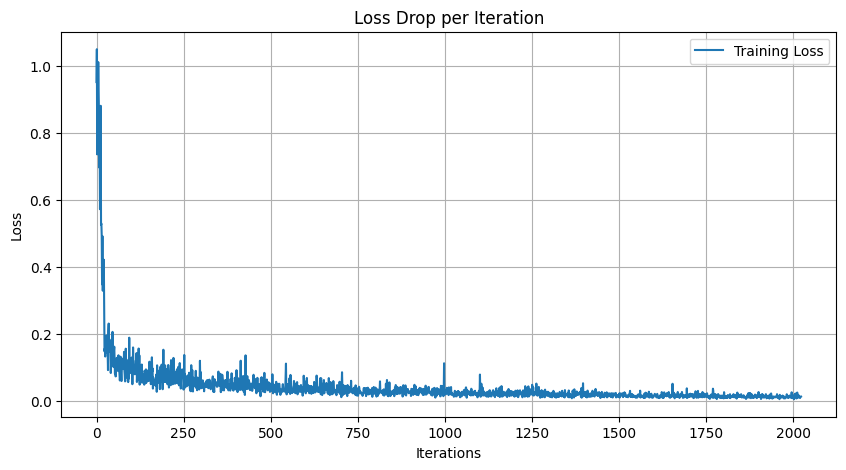

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from sklearn.metrics import mean_squared_error
from math import sqrt
import torch
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual data)


# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Scale labels
scaler = StandardScaler()
train_labels_scaled = scaler.fit_transform(train_labels.values.reshape(-1, 1)).flatten()
test_labels_scaled = scaler.transform(test_labels.values.reshape(-1, 1)).flatten()

# Load pre-trained model and tokenizer
model_name = "distilbert-base-uncased"  # You can use any other transformer model available in the Hugging Face model hub
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)  # Regression with one output label

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Tokenize the text data
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_data.tolist(), truncation=True, padding=True)

# Convert labels to tensors
train_labels_tensor = torch.tensor(train_labels_scaled, dtype=torch.float32).to(device)
test_labels_tensor = torch.tensor(test_labels_scaled, dtype=torch.float32).to(device)

# Convert data to PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_encodings['input_ids']).to(device),
                                               torch.tensor(train_encodings['attention_mask']).to(device),
                                               train_labels_tensor)

test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_encodings['input_ids']).to(device),
                                              torch.tensor(test_encodings['attention_mask']).to(device),
                                              test_labels_tensor)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training
model.train()
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=38, shuffle=True)

losses = []
for epoch in range(8):  # Adjust the number of epochs as needed
    print('epoch')
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels.unsqueeze(1))
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

# Evaluation
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.squeeze(1)
        predictions.extend(preds.tolist())

# Scale predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

rmse = sqrt(mean_squared_error(test_labels, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting Loss Drop per Iteration
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Drop per Iteration')
plt.legend()
plt.grid(True)
plt.show()


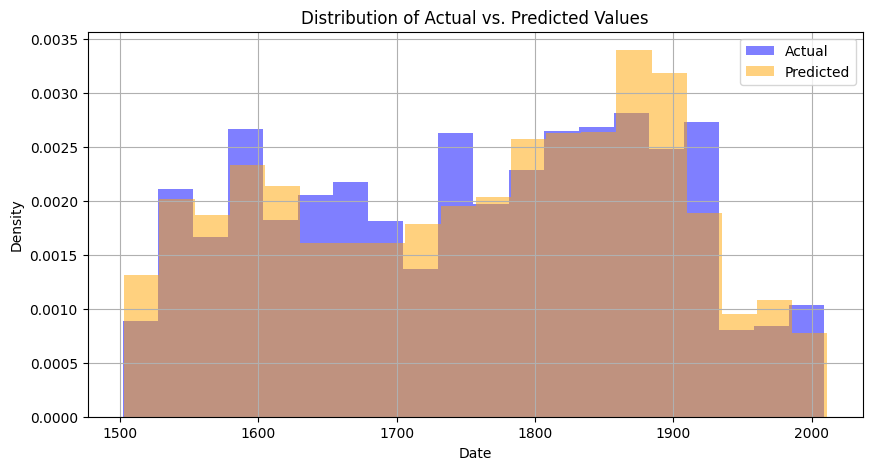

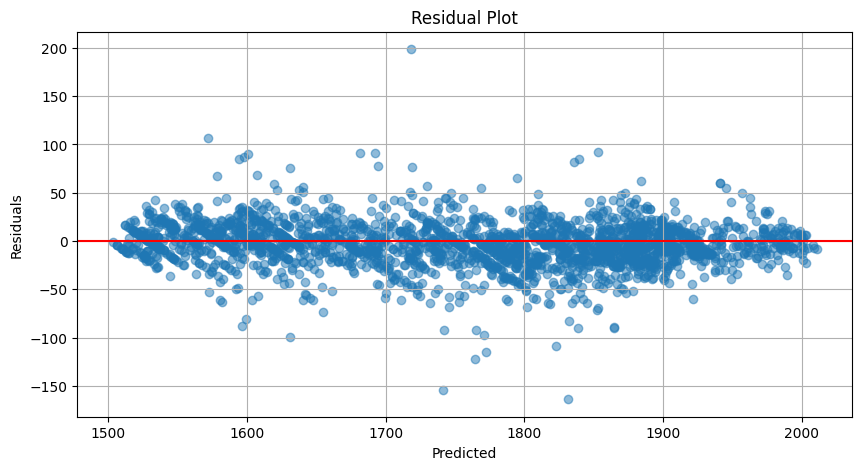

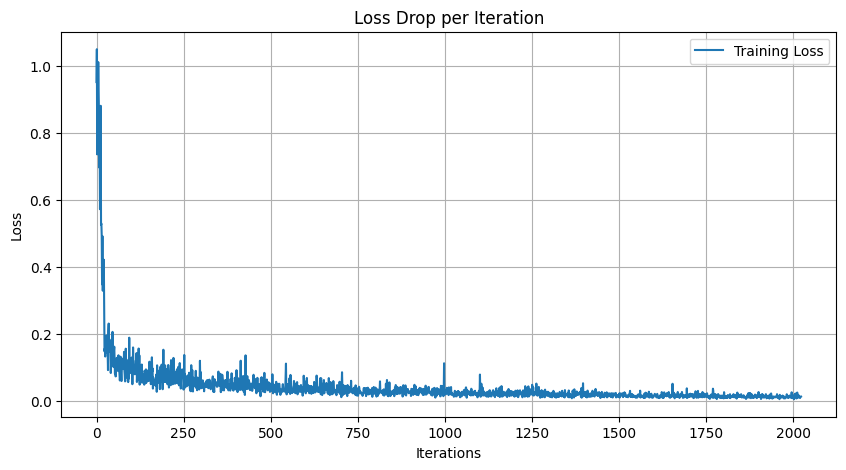

In [77]:
# Distribution of Actual vs. Predicted Values
plt.figure(figsize=(10, 5))
plt.hist(test_labels, bins=20, alpha=0.5, color='blue', label='Actual', density=True)
plt.hist(predictions, bins=20, alpha=0.5, color='orange', label='Predicted', density=True)
plt.xlabel('Date')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Residual Plot
residuals = test_labels - predictions
plt.figure(figsize=(10, 5))
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Learning Curve
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Drop per Iteration')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance (if applicable)
# For transformer-based models like BERT, feature importance can be challenging to interpret.


In [20]:
from wordcloud import WordCloud

def create_wordcloud(data, column, title):



    #This setting disables the detection of collocations (multi-word phrases) to focus on individual words.
    wordcloud = WordCloud(width=800, height=400, background_color='black', #black
                          colormap='YlGnBu_r', collocations=False).generate(' '.join(data[column]))

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {column} in {title}', fontsize=16, color='black')
    plt.axis('off')
    plt.show()

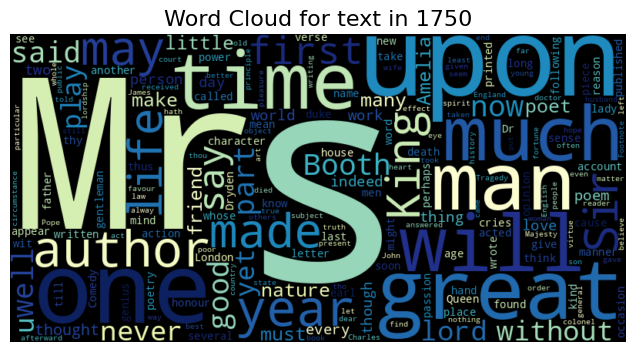

In [21]:
create_wordcloud(df[df["decade"] == 1750], 'text', '1750')

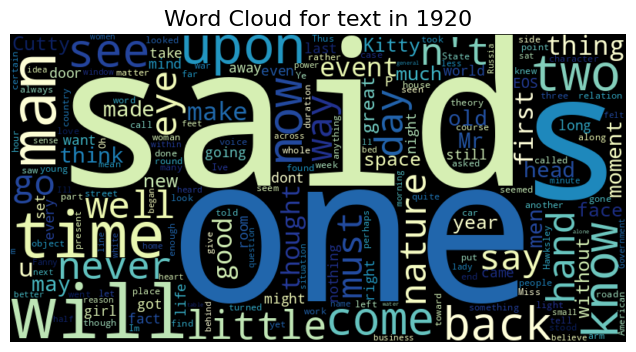

In [22]:
create_wordcloud(df[df["decade"] == 1920], 'text', '1920')